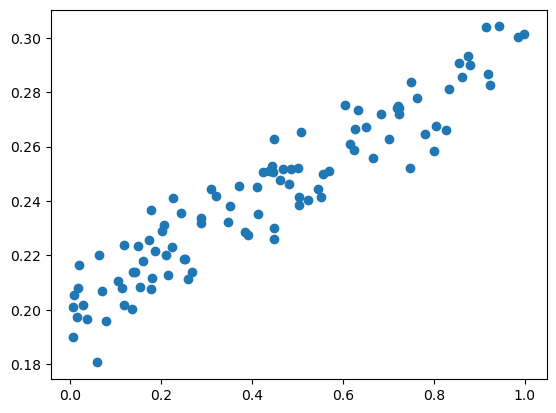

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.autograd import Variable
import torch
x_data = np.random.rand(100)
noise = np.random.normal(0,0.01,x_data.shape)
y_data = x_data*0.1+0.2+noise

plt.scatter(x_data,y_data)
plt.show()

In [3]:
x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)

In [4]:
#把numpy变成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
inputs = Variable(x_data)
target = Variable(y_data) 

In [5]:
#构建神经网络模型
#一般把网络中具有可学习参数的层放在__init__()中
class LinerRegression(nn.Module):
    #定义网络结构
    def __init__(self):
        #初始化nn.Module
        super(LinerRegression,self).__init__()
        self.fc = nn.Linear(1,1)    
    #定义网络计算
    def forward(self,x):
        out = self.fc(x)
        return out
    

In [6]:
#定义模型
model = LinerRegression()
#定义代价函数
mse_loss = nn.MSELoss()
#定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [7]:
for name, parameters in model.named_parameters():
    print('name:{},param{}'.format(name,parameters))

name:fc.weight,paramParameter containing:
tensor([[0.4564]], requires_grad=True)
name:fc.bias,paramParameter containing:
tensor([0.7616], requires_grad=True)


In [8]:
for i in range(1001):
    out = model(inputs)
    #计算loss
    loss = mse_loss(out,target)
    #梯度清零
    optimizer.zero_grad()
    #计算梯度
    loss.backward()
    #修改权值
    optimizer.step()
    if i%200 ==0:
        print(i,loss.item())

0 0.5221936106681824
200 9.430295904166996e-05
400 9.160907939076424e-05
600 9.15957207325846e-05
800 9.159567707683891e-05
1000 9.159567707683891e-05


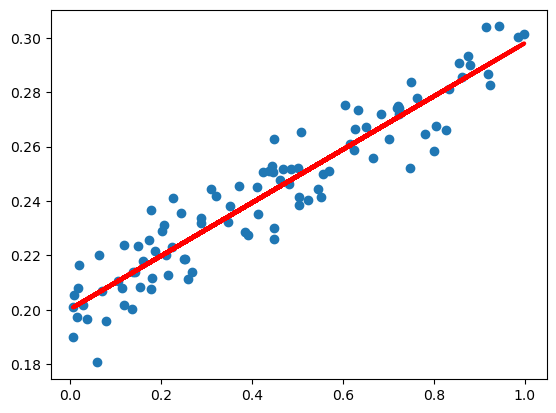

In [9]:
y_perd = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_perd.data.numpy(),'r-',lw=3)
plt.show()